# King County House Price Prediction

# Abstract
This report is to use supervised learning algorithms(with labels: price/price_cat) to train and predict the house price in the King County. The raw data is imported as a dataframe with one hot encoding and this is convenient for the integer variables and their range is very big, then I will separate the process into two part, the first part is to treat the problem as the classification problem, which means, I'll use object of the those supervised learning to train the model and test the model with AUC(because this is a binary classification problem). The second part is that I'll treat the problem as the regression problem. The objects of regressors belong to those supervised learning are used to train and test data(through RMSE). The key method here is to modify each model through tuning the hyper parameters(RandomSearch amd GridSearch). I will find out that the performance of each model improves after hyperparameters-tuned. Besides that the final outcome is the xGBoost algorithm performs best in classification and regression problem. 

## Approach
Algorithms used:
   
    For Part A:
        Bagging Algo: Random Forest Classifier
        Boosting Algo: XGBoost Classifier
    For Part B:
        Logistic Regression
    For Part C:
        Bagging Algo: Random Forest Regressor
    For Part D:
        Linear Regression
    For Part E:
        Another supervised learning: kNearestNeighbors Classifier
                                     kNearestNeighbors Regressor

## Dataset
   Dataset of King County House Price prediction is from Kaggle platform. The dataset contains house sales prices for    King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [2]:
features = pd.read_csv('king_county_cleansed.csv')  #readin the dataset

In [3]:
features.head(5)  #The dataset uses one-hot encoding

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features.describe()  #information of the dataset

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


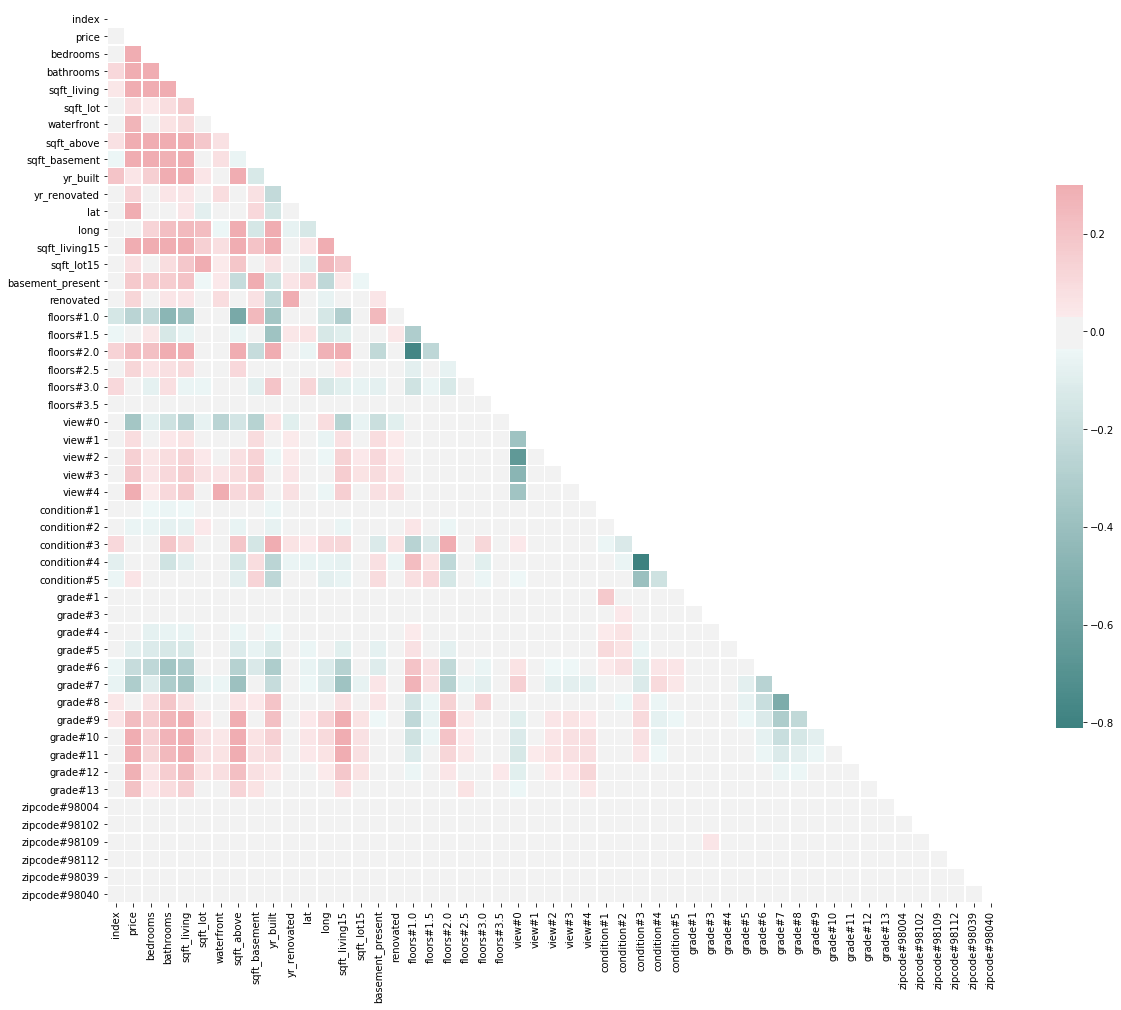

In [5]:
#Relationship between features
corr = features.corr() 

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

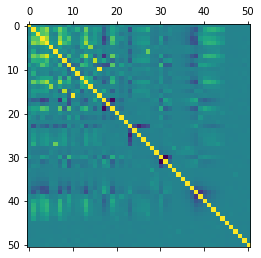

In [6]:
plt.matshow(features.corr())

In [7]:
# count the mean value of price.
median_price = features.loc[:,"price"].median()  
print(median_price)

450000.0


In [8]:
# separate price column into two categories: 1/-1.(for classification)
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
# Take a look at the first 10 rows of new columns. 
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


# Part A

# Random Forest Classifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [13]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#70% training and 30% test

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [16]:
#The default hyper parameter of Random Forest classifier.
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
#Use the oob method to count the importance of features in Random Forest algorithm.
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.790901e-01
sqft_living         1.278886e-01
sqft_living15       8.824315e-02
sqft_above          7.909773e-02
long                5.317732e-02
sqft_lot15          5.162777e-02
yr_built            4.815505e-02
sqft_lot            4.659926e-02
bathrooms           3.605224e-02
grade#7             2.661295e-02
sqft_basement       2.479253e-02
grade#6             1.763511e-02
grade#9             1.684261e-02
bedrooms            1.586685e-02
grade#8             1.362321e-02
basement_present    1.003710e-02
floors#1.0          7.699959e-03
grade#10            7.447512e-03
view#0              7.302756e-03
floors#2.0          5.776596e-03
condition#3         5.654234e-03
condition#4         4.428942e-03
floors#1.5          4.234449e-03
condition#5         3.184480e-03
yr_renovated        2.996710e-03
view#2              2.313734e-03
renovated           1.637748e-03
zipcode#98040       1.202287e-03
view#3              1.187211e-03
view#4              1.144344e-03
zipcode#98

In [18]:
top_features = feature_imp.head(10)
top_features

lat              0.279090
sqft_living      0.127889
sqft_living15    0.088243
sqft_above       0.079098
long             0.053177
sqft_lot15       0.051628
yr_built         0.048155
sqft_lot         0.046599
bathrooms        0.036052
grade#7          0.026613
dtype: float64

No handles with labels found to put in legend.


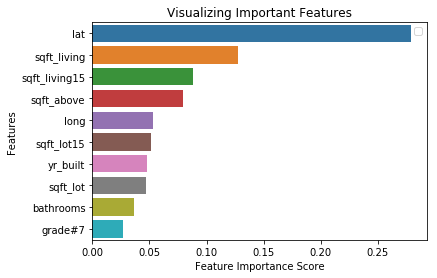

In [19]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [20]:
from pprint import pprint

In [21]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
#PPRINT will print the dictionary in a better format.
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Finding important hyper-parameters

# we will use RandomSearchCV and GridSearchCV to find the best values for the same

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100,
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
# Show the best set of hyperparameters 
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

# Evaluate Random Search

In [26]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [27]:
# create a base model for RF.
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [28]:
# Use the best calssifier with best parameters.
best_random = clf_random.best_estimator_

In [29]:
# Compare the roc value of base model and the best model.
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.8903954334405109
ROC for best model : 0.9057664521213714


# Grid Search with Cross Validation

In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
# Train the model.
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [32]:
# Show the best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [33]:
# Use the best classifier with best parameters
best_grid = grid_search.best_estimator_

In [34]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.90646129713286


# Now lets implement XGBoost(eXtreme Gradient Boosting)

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [36]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [38]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.25%


# which are the important hyper parameters?

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## Tune the number of trees in XGBoost classifier.

Best: -0.213291 using {'n_estimators': 350}
-0.256054 (0.012663) with: {'n_estimators': 50}
-0.230680 (0.012977) with: {'n_estimators': 100}
-0.222248 (0.013174) with: {'n_estimators': 150}
-0.217743 (0.013489) with: {'n_estimators': 200}
-0.215334 (0.013208) with: {'n_estimators': 250}
-0.213851 (0.013375) with: {'n_estimators': 300}
-0.213291 (0.013081) with: {'n_estimators': 350}


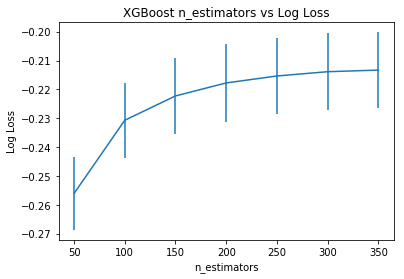

In [40]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

## Tune the size of Decision Trees in XGBoost

In [41]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
#define the kfold size
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.9s finished


Best: -0.209956 using {'max_depth': 7}
-0.329159 (0.010902) with: {'max_depth': 1}
-0.230680 (0.012977) with: {'max_depth': 3}
-0.213331 (0.012860) with: {'max_depth': 5}
-0.209956 (0.012709) with: {'max_depth': 7}
-0.216240 (0.014608) with: {'max_depth': 9}


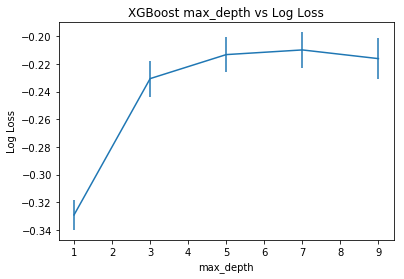

In [42]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

# Tune the size of Decision Trees in XGBoost

In [43]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.1s finished


Best: -0.209956 using {'max_depth': 7}
-0.329159 (0.010902) with: {'max_depth': 1}
-0.230680 (0.012977) with: {'max_depth': 3}
-0.213331 (0.012860) with: {'max_depth': 5}
-0.209956 (0.012709) with: {'max_depth': 7}
-0.216240 (0.014608) with: {'max_depth': 9}


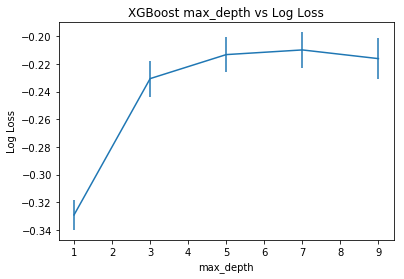

In [44]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

# Tune the Number of Trees and Max Depth in XGBoost 

In [45]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7) #define the kfold.
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)  
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  8.8min finished


Best: -0.212135 using {'max_depth': 6, 'n_estimators': 250}
-0.216404 (0.012975) with: {'max_depth': 6, 'n_estimators': 350}
-0.214093 (0.012614) with: {'max_depth': 6, 'n_estimators': 300}
-0.212135 (0.012737) with: {'max_depth': 6, 'n_estimators': 250}
-0.219029 (0.013793) with: {'max_depth': 6, 'n_estimators': 400}
-0.224496 (0.015776) with: {'max_depth': 7, 'n_estimators': 350}
-0.220508 (0.015000) with: {'max_depth': 7, 'n_estimators': 300}
-0.216875 (0.013933) with: {'max_depth': 7, 'n_estimators': 250}
-0.228533 (0.016481) with: {'max_depth': 7, 'n_estimators': 400}
-0.233446 (0.017038) with: {'max_depth': 8, 'n_estimators': 350}
-0.228622 (0.016719) with: {'max_depth': 8, 'n_estimators': 300}
-0.223634 (0.015654) with: {'max_depth': 8, 'n_estimators': 250}
-0.238677 (0.017864) with: {'max_depth': 8, 'n_estimators': 400}
-0.242940 (0.018239) with: {'max_depth': 9, 'n_estimators': 350}
-0.237156 (0.017803) with: {'max_depth': 9, 'n_estimators': 300}
-0.231321 (0.017210) with: {'m

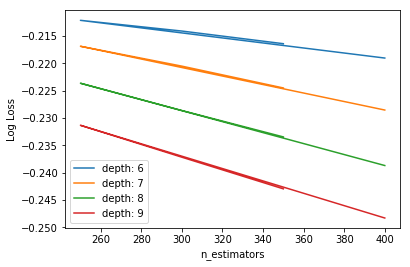

In [46]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

# Creating the model with the best values for Hyper parameters

In [47]:
# use the best classifier we got just now.
model = XGBClassifier(max_depth=6, n_estimators=250)

In [48]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [49]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [50]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.910649879972663


# Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

# Part B: Classification with Logistic Regression

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [52]:
# separate the column into 1 and 0 for logistic regression
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [53]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [54]:
# target column for the model. 
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [55]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [56]:
# Train the model
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        20:35:30   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

# Looking at the Z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

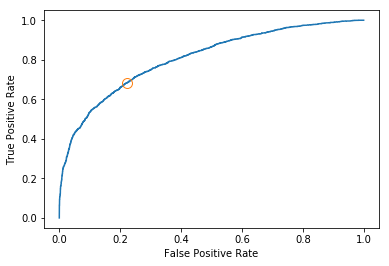

In [58]:
# draw the roc curve.
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [59]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

# As compared to Models in Part A, the accuracy of the Logistic Regression model is less.

# Part C:  Regression with Tress

# Random Forest based Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [61]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features
# This is a regression model, so the value is no longer the type of category.
y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

# Random Search Cross Validation in Scikit-Learn

In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [64]:
# method to calculate the accuracy for the regression model.
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 77320.6040 degrees.
Accuracy = 85.73%.


In [65]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 72452.2013 degrees.
Accuracy = 86.65%.


# Grid Search with Cross Validation

In [67]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [68]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.6min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [69]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [70]:
# best classifier with best parameters.
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 90961.5923 degrees.
Accuracy = 82.28%.


# Now lets implement XGBoost (eXtreme Gradient Boosting)

In [71]:
from xgboost import XGBRegressor

In [72]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 83874.1963 degrees.
Accuracy = 84.17%.


In [73]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
# tune the number of trees.
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.707901 using {'n_estimators': 350}
0.678665 (0.018043) with: {'n_estimators': 50}
0.691807 (0.016927) with: {'n_estimators': 100}
0.697999 (0.016705) with: {'n_estimators': 150}
0.701934 (0.016628) with: {'n_estimators': 200}
0.704927 (0.016528) with: {'n_estimators': 250}
0.706774 (0.016808) with: {'n_estimators': 300}
0.707901 (0.016675) with: {'n_estimators': 350}


In [75]:
# Tune the max_depth of the model.
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.5s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.848073 using {'max_depth': 7}
0.660138 (0.057302) with: {'max_depth': 1}
0.805811 (0.041714) with: {'max_depth': 3}
0.847145 (0.033476) with: {'max_depth': 5}
0.848073 (0.040590) with: {'max_depth': 7}
0.841897 (0.043796) with: {'max_depth': 9}


In [76]:
# grid search wit tree number and max_fepth at the same time.
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.8min finished


Best: 0.724668 using {'max_depth': 5, 'n_estimators': 300}
0.719555 (0.017251) with: {'max_depth': 4, 'n_estimators': 300}
0.719376 (0.016821) with: {'max_depth': 4, 'n_estimators': 350}
0.719533 (0.016860) with: {'max_depth': 4, 'n_estimators': 400}
0.724668 (0.017459) with: {'max_depth': 5, 'n_estimators': 300}
0.724532 (0.016918) with: {'max_depth': 5, 'n_estimators': 350}
0.724039 (0.016508) with: {'max_depth': 5, 'n_estimators': 400}
0.723225 (0.015824) with: {'max_depth': 6, 'n_estimators': 300}
0.721923 (0.015984) with: {'max_depth': 6, 'n_estimators': 350}
0.720662 (0.015729) with: {'max_depth': 6, 'n_estimators': 400}
0.720345 (0.016651) with: {'max_depth': 7, 'n_estimators': 300}
0.718613 (0.016550) with: {'max_depth': 7, 'n_estimators': 350}
0.716946 (0.016470) with: {'max_depth': 7, 'n_estimators': 400}


In [77]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
# the outcome of the regression probelm using XGBoost regressor after tuning the hyperparameter.
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 68781.3220 degrees.
Accuracy = 87.18%.


# XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

# Evaluating the regression models

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 143247.55


In [81]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 131296.99


In [82]:
#Linear regression - multiple linear regression model from previous assignment
print('Linear regression best model from Assignment 3: ' + str(205986.42))

Linear regression best model from Assignment 3: 205986.42


# Part D: Linear Regression with Regression Regularization

In [100]:
#Establish a baseliine by training a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

base_model_lr = LinearRegression()
base_model_lr.fit(X_train_reg, y_train_reg)
predictions = base_model_lr.predict(X_test_reg)
rmse = mean_squared_error(y_test_reg, predictions)
print('RMSE: {}'. format(rmse))

RMSE: 37172260796.88864


In [105]:
best_accuracy_lr = evaluate_reg(base_model_lr, X_test_reg, y_test_reg)
print("Accuracy for Linear Regressionn :" + str(best_accuracy_lr) + '%')

Accuracy for Linear Regressionn :76.78257551087293%


## Use Ridge regression

In [101]:
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(X_train_reg, y_train_reg)
predictions = lr_ridge.predict(X_test_reg)
rmse_ridge = mean_squared_error(y_test_reg, predictions)
print('RMSE: {}'. format(rmse))

RMSE: 37172260796.88864


In [106]:
best_accuracy_Ridge = evaluate_reg(lr_ridge, X_test_reg, y_test_reg)
print("Accuracy for Ridge Regressionn :" + str(best_accuracy_Ridge) + '%')

Accuracy for Ridge Regressionn :76.63496217181806%


# Part E:  k Nearest Neighbors Algorithm

kNN is also an supervised learning algorithm for both classification and regression

Lets take a look at the Classification problem

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3) #Create a base model with  k = 3.

#Train the model using training sets
knn_model.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Now we can tune the hyper parameters k.

n: max value of AUC
21 0.748671894185575


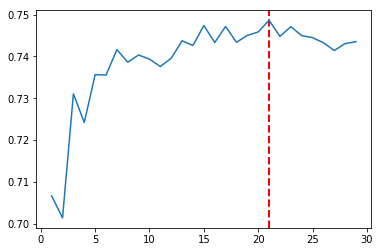

In [92]:
# Tune the value of k and plot for classification.
neighbors = range(1, 30)
result_list = []
AUC_result = {}
for n in neighbors:
    Tuning_model = KNeighborsClassifier(n_neighbors=n)
    Tuning_model.fit(X_train, y_train)
    result = evaluate(Tuning_model, X_train, y_train, X_test, y_test)
    AUC_result[n] = result
    result_list.append(result)
maxmum = max(AUC_result, key = AUC_result.get)
print('n: ' + 'max value of AUC')
print(maxmum, AUC_result[maxmum])
plt.axvline(maxmum, color = 'red', 
            linestyle = 'dashed', 
            linewidth = 2)
plt.plot(neighbors, result_list)

### kNN for Regresion problem

In [95]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    return accuracy

n: max value of AUC
15 68.93818114837137


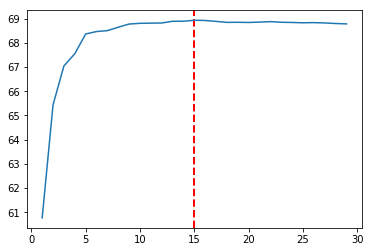

In [96]:
# Tune the value of k and plot for regression.
from sklearn.neighbors import KNeighborsRegressor
neighbors = range(1, 30)
result_list = []
AUC_result = {}
for n in neighbors:
    Tuning_model = KNeighborsRegressor(n_neighbors=n)
    Tuning_model.fit(X_train_reg, y_train_reg)
    result = evaluate_reg(Tuning_model, X_test_reg, y_test_reg)
    AUC_result[n] = result
    result_list.append(result)
maxmum = max(AUC_result, key = AUC_result.get)
print('n: ' + 'max value of AUC')
print(maxmum, AUC_result[maxmum])
plt.axvline(maxmum, color = 'red', 
            linestyle = 'dashed', 
            linewidth = 2)
plt.plot(neighbors, result_list)

# Conclusions

## In conclusion, XGBoost classifier and regressor are both the best one of all the models.

1.RF classifier: 
ROC for base model : 0.8903954334405109
RandomSearch: ROC for best model : 0.9057664521213714
GridSearch: ROC for best grid search model : 0.90646129713286

2.xGBOOst classifier:
ROC for the XGBoost model is: 0.910649879972663

3.LR classifier:
AUC for logistic regression: 0.8078695178147917

4.RF regressor:
Base model:  Average Error: 77320.6040 degrees. Accuracy = 85.73%.
RandomSearch: Average Error: 72452.2013 degrees. Accuracy = 86.65%.
GridSearch: Average Error: 90961.5923 degrees. Accuracy = 82.28%.

5.xGBOOst regressor:
GridSearch:  Average Error: 68781.3220 degrees. Accuracy = 87.18%.

6.Linear Regression:
Accuracy for Linear Regressionn :76.78257551087293%

7.Ridge Regression:
Accuracy for Ridge Regressionn :76.63496217181806%

8.kNN classifier:
n: max value of AUC
21 0.748671894185575

  kNN Regressor:
n: max value of AUC
15 68.93818114837137

# Citation

1)One hot encoding
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

2)kNN find the greatest value and key in dictionary
https://stackoverflow.com/questions/26871866/print-highest-value-in-dict-with-key/26871933

3)Regularization Ridge Regression
https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2

4)Tuning kNN algorithm
https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6

Copyright <YEAR> <COPYRIGHT HOLDER>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.